In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# to build the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/data.csv


# Understanding the Data

## Asking Basic questions

In [2]:
# Loading the dataset
df = pd.read_csv(r'/kaggle/input/breast-cancer/data.csv')

In [3]:
# Getting random samples from the data
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
504,915186,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,...,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520,NaN
33,854002,M,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,...,30.90,161.40,1813.0,0.15090,0.6590,0.60910,0.17850,0.3672,0.11230,NaN
401,904647,B,11.930,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,...,20.14,87.64,589.5,0.13740,0.1575,0.15140,0.06876,0.2460,0.07262,NaN
375,901303,B,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,...,19.14,113.10,861.5,0.12350,0.2550,0.21140,0.12510,0.3153,0.08960,NaN
255,886452,M,13.960,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,...,22.07,108.10,826.0,0.15120,0.3262,0.32090,0.13740,0.3068,0.07957,NaN
10,845636,M,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,33.88,123.80,1150.0,0.11810,0.1551,0.14590,0.09975,0.2948,0.08452,NaN
197,877159,M,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,...,24.70,129.10,1228.0,0.08822,0.1963,0.25350,0.09181,0.2369,0.06558,NaN
281,8912055,B,11.740,14.02,74.24,427.3,0.07813,0.04340,0.02245,0.02763,...,18.26,84.70,533.7,0.10360,0.0850,0.06735,0.08290,0.3101,0.06688,NaN
291,8915,B,14.960,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,26.19,109.10,809.8,0.13130,0.3030,0.18040,0.14890,0.2962,0.08472,NaN
23,851509,M,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,...,35.59,188.00,2615.0,0.14010,0.2600,0.31550,0.20090,0.2822,0.07526,NaN


In [4]:
# Data Shape (rows, cols)
df.shape

(569, 33)

In [5]:
# columns info  (dtypes)
# Target Variable : Diagnosis is categorical
# 'Unnamed: 32' has only null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# getting column wise null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Basic statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
# By just seeing this columns we can identify that they aren't every much useful to us, so we will just drop them
df.loc[:,['id','Unnamed: 32']]

,id,Unnamed: 32
0,842302,NaN
1,842517,NaN
2,84300903,NaN
3,84348301,NaN
4,84358402,NaN
...,...,...
564,926424,NaN
565,926682,NaN
566,926954,NaN
567,927241,NaN


In [9]:
df.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
# getting to know the target variable
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [12]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

There are 2 types of diagnosis, M : Malignant and B : Benign.
We will use a simple list comprehension to encode the categories into -> Malignant : 1 and Benign : 0

In [13]:
df.diagnosis=[1 if each=="M" else 0 for each in df.diagnosis]

In [14]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [15]:
# Checking for duplicate values
df.duplicated().sum()

0

## Univariate Analysis

In [16]:
df_plot = pd.Categorical(df['diagnosis'])
df_plot = df_plot.rename_categories({0 : 'Benign', 1 : 'Malignant'})
# df_plot = df_plot.rename_categories({0 : 'Benign', 1 : 'Malignant'})
df_plot.value_counts()

Benign       357
Malignant    212
Name: count, dtype: int64

<Axes: >

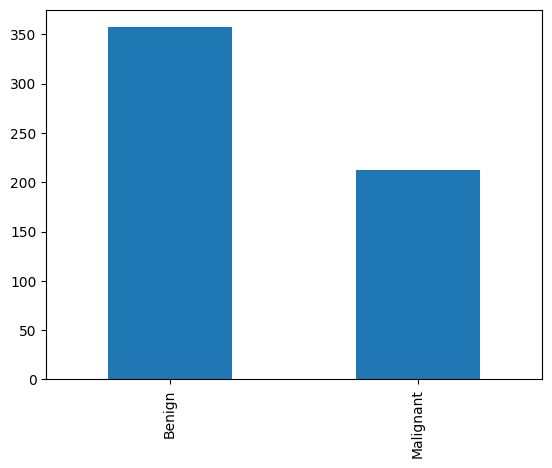

In [17]:
df_plot.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

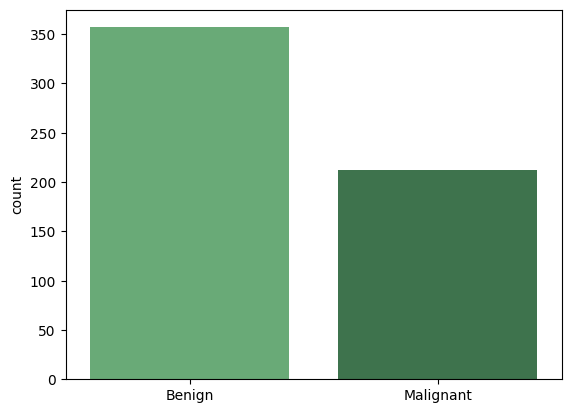

In [18]:
#df_plot = df.diagnosis.astype('category')
sns.countplot(x=df_plot, palette="Greens_d" )

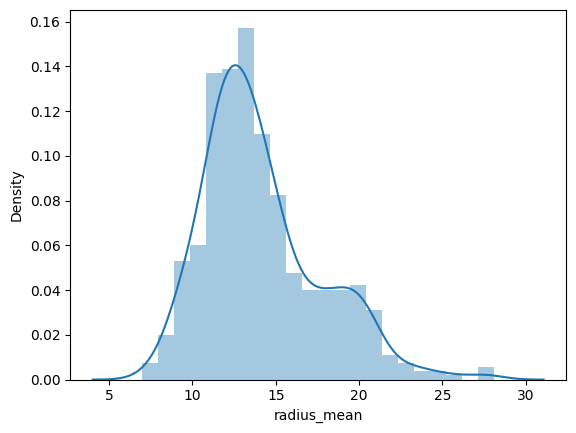

In [19]:
sns.distplot(df['radius_mean']);

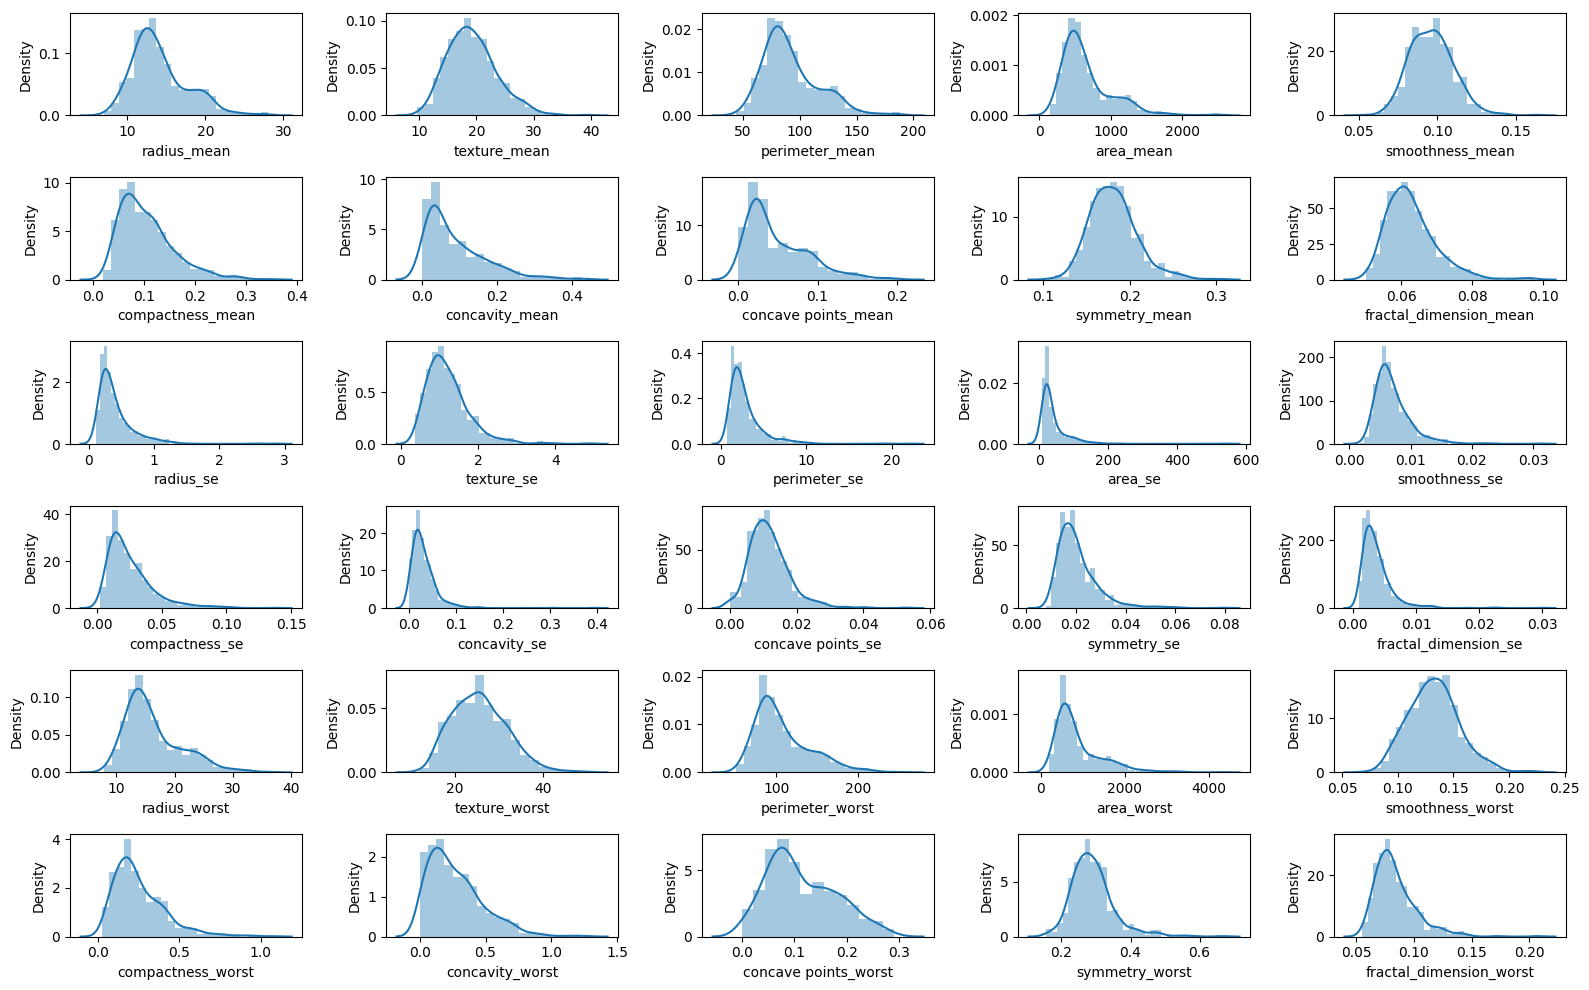

In [20]:
# Select numerical columns (excluding the first categorical column)
df_numeric = df.iloc[:, 1:]  # Excludes the first column

# Loop over all columns
fig, ax = plt.subplots(figsize = (16, 10))
for n, col in enumerate(df_numeric.columns):
    plt.subplot(6, 5, n+1)
    sns.distplot(df[col])
    # plt.axis('off')
plt.tight_layout()
plt.show()  # Optional: Display the plot before saving (comment out to only save)


------------
Columns names probably not a normal dist:
                    Column  Not_Normal        p-value   Normality
0                diagnosis        True   0.000000e+00  Not Normal
0              radius_mean        True   1.286172e-16  Not Normal
0             texture_mean        True   4.685883e-10  Not Normal
0           perimeter_mean        True   3.595463e-18  Not Normal
0                area_mean        True   2.386040e-42  Not Normal
0          smoothness_mean        True   6.925619e-07  Not Normal
0         compactness_mean        True   2.733343e-25  Not Normal
0           concavity_mean        True   1.870652e-31  Not Normal
0      concave points_mean        True   1.120701e-22  Not Normal
0            symmetry_mean        True   1.589840e-13  Not Normal
0   fractal_dimension_mean        True   1.428030e-32  Not Normal
0                radius_se        True   1.699780e-92  Not Normal
0               texture_se        True   1.189911e-46  Not Normal
0             perimet

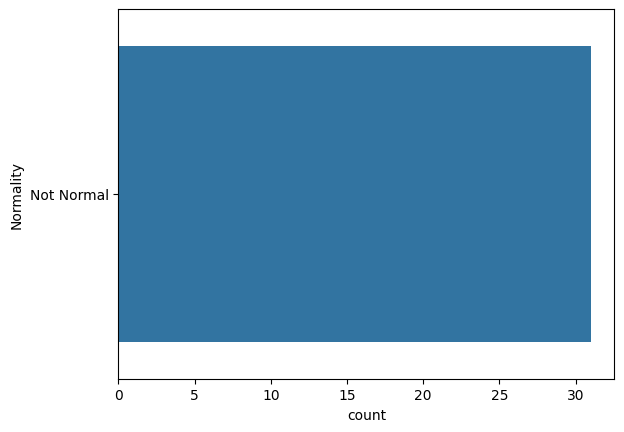

In [21]:
alpha = 0.05
df_list = list()
cat_map = {True: 'Not Normal',
           False: 'Maybe Normal'}
for col in df.columns:
    k2, p = stats.normaltest(df[col])
    is_not_normal = p < alpha
    tmp_df = pd.DataFrame({'Column': [col],
                           'Not_Normal': [is_not_normal],
                           'p-value': [p],
                           'Normality': cat_map[is_not_normal]
                           })
    df_list.append(tmp_df)

df_results = pd.concat(df_list)
df_results['Normality'] = df_results['Normality'].astype('category')

print('------------')
print('Columns names probably not a normal dist:')
# full data
print(df_results[(df_results['Normality'] == 'Not Normal')])
# only column names
# print(df_results[(df_results['Normality'] == 'Not Normal')]['Column'])
print('------------')
print('Plotting countplot')
sns.countplot(data=df_results, y='Normality', orient='v')
plt.show()

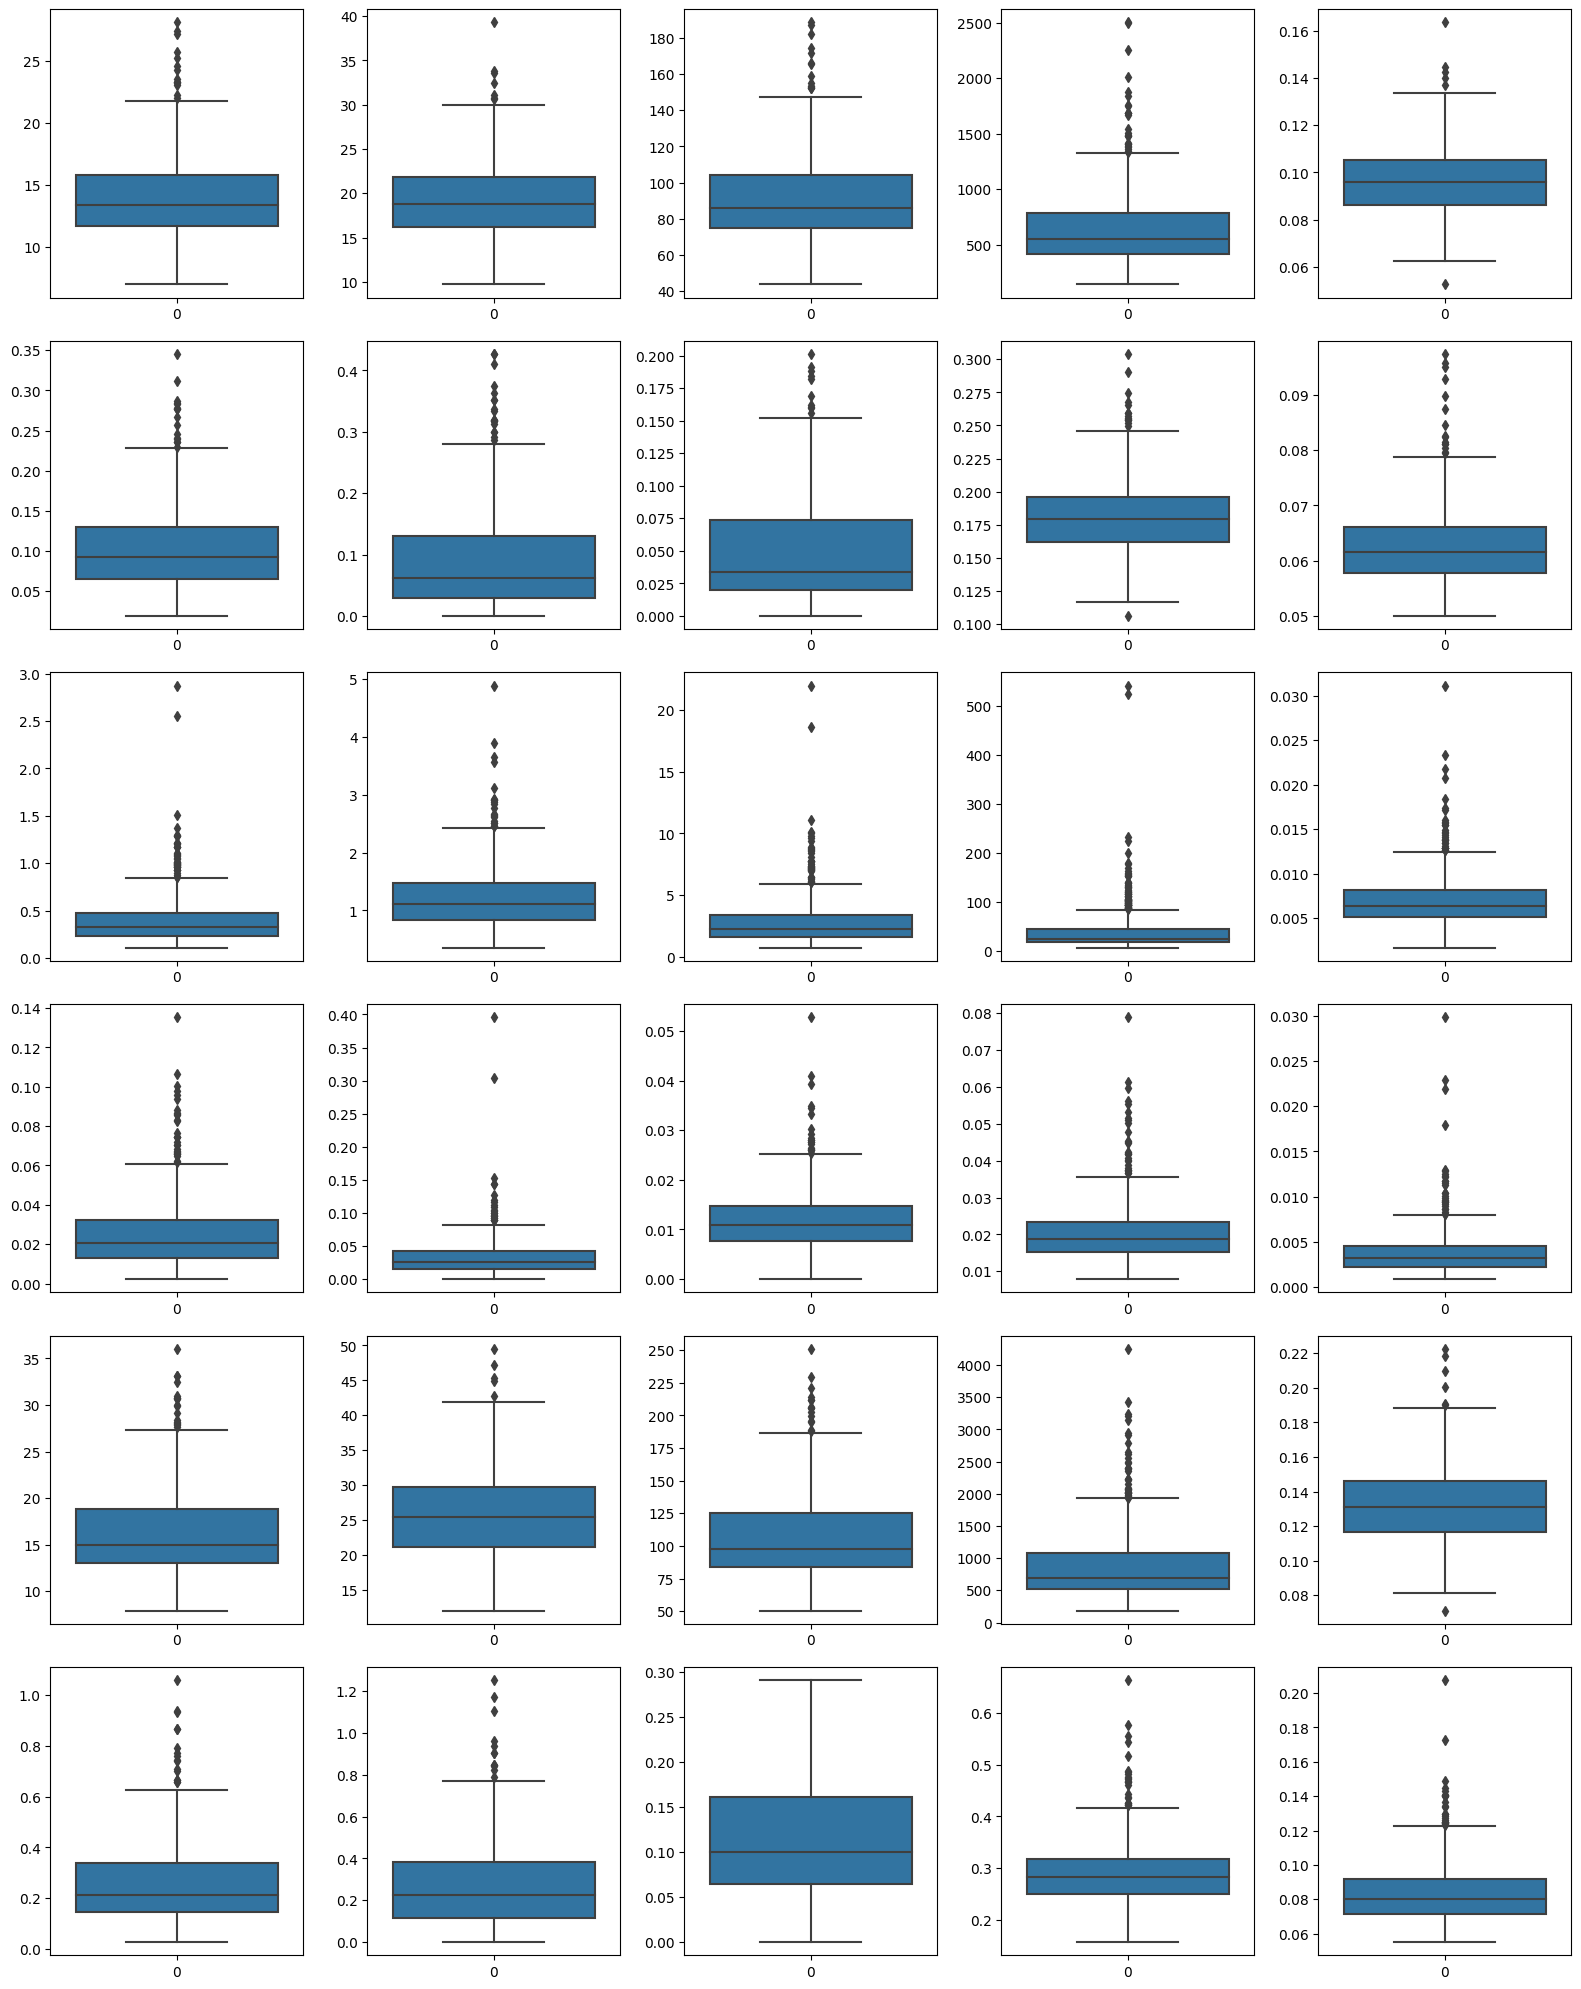

In [22]:
# Loop over all columns
fig, ax = plt.subplots(figsize = (16, 20))
for n, col in enumerate(df_numeric.columns):
    plt.subplot(6, 5, n+1)
    sns.boxplot(df[col])
    # plt.axis('off')
plt.tight_layout()
plt.show()

## Multivariate Analysis

<Axes: >

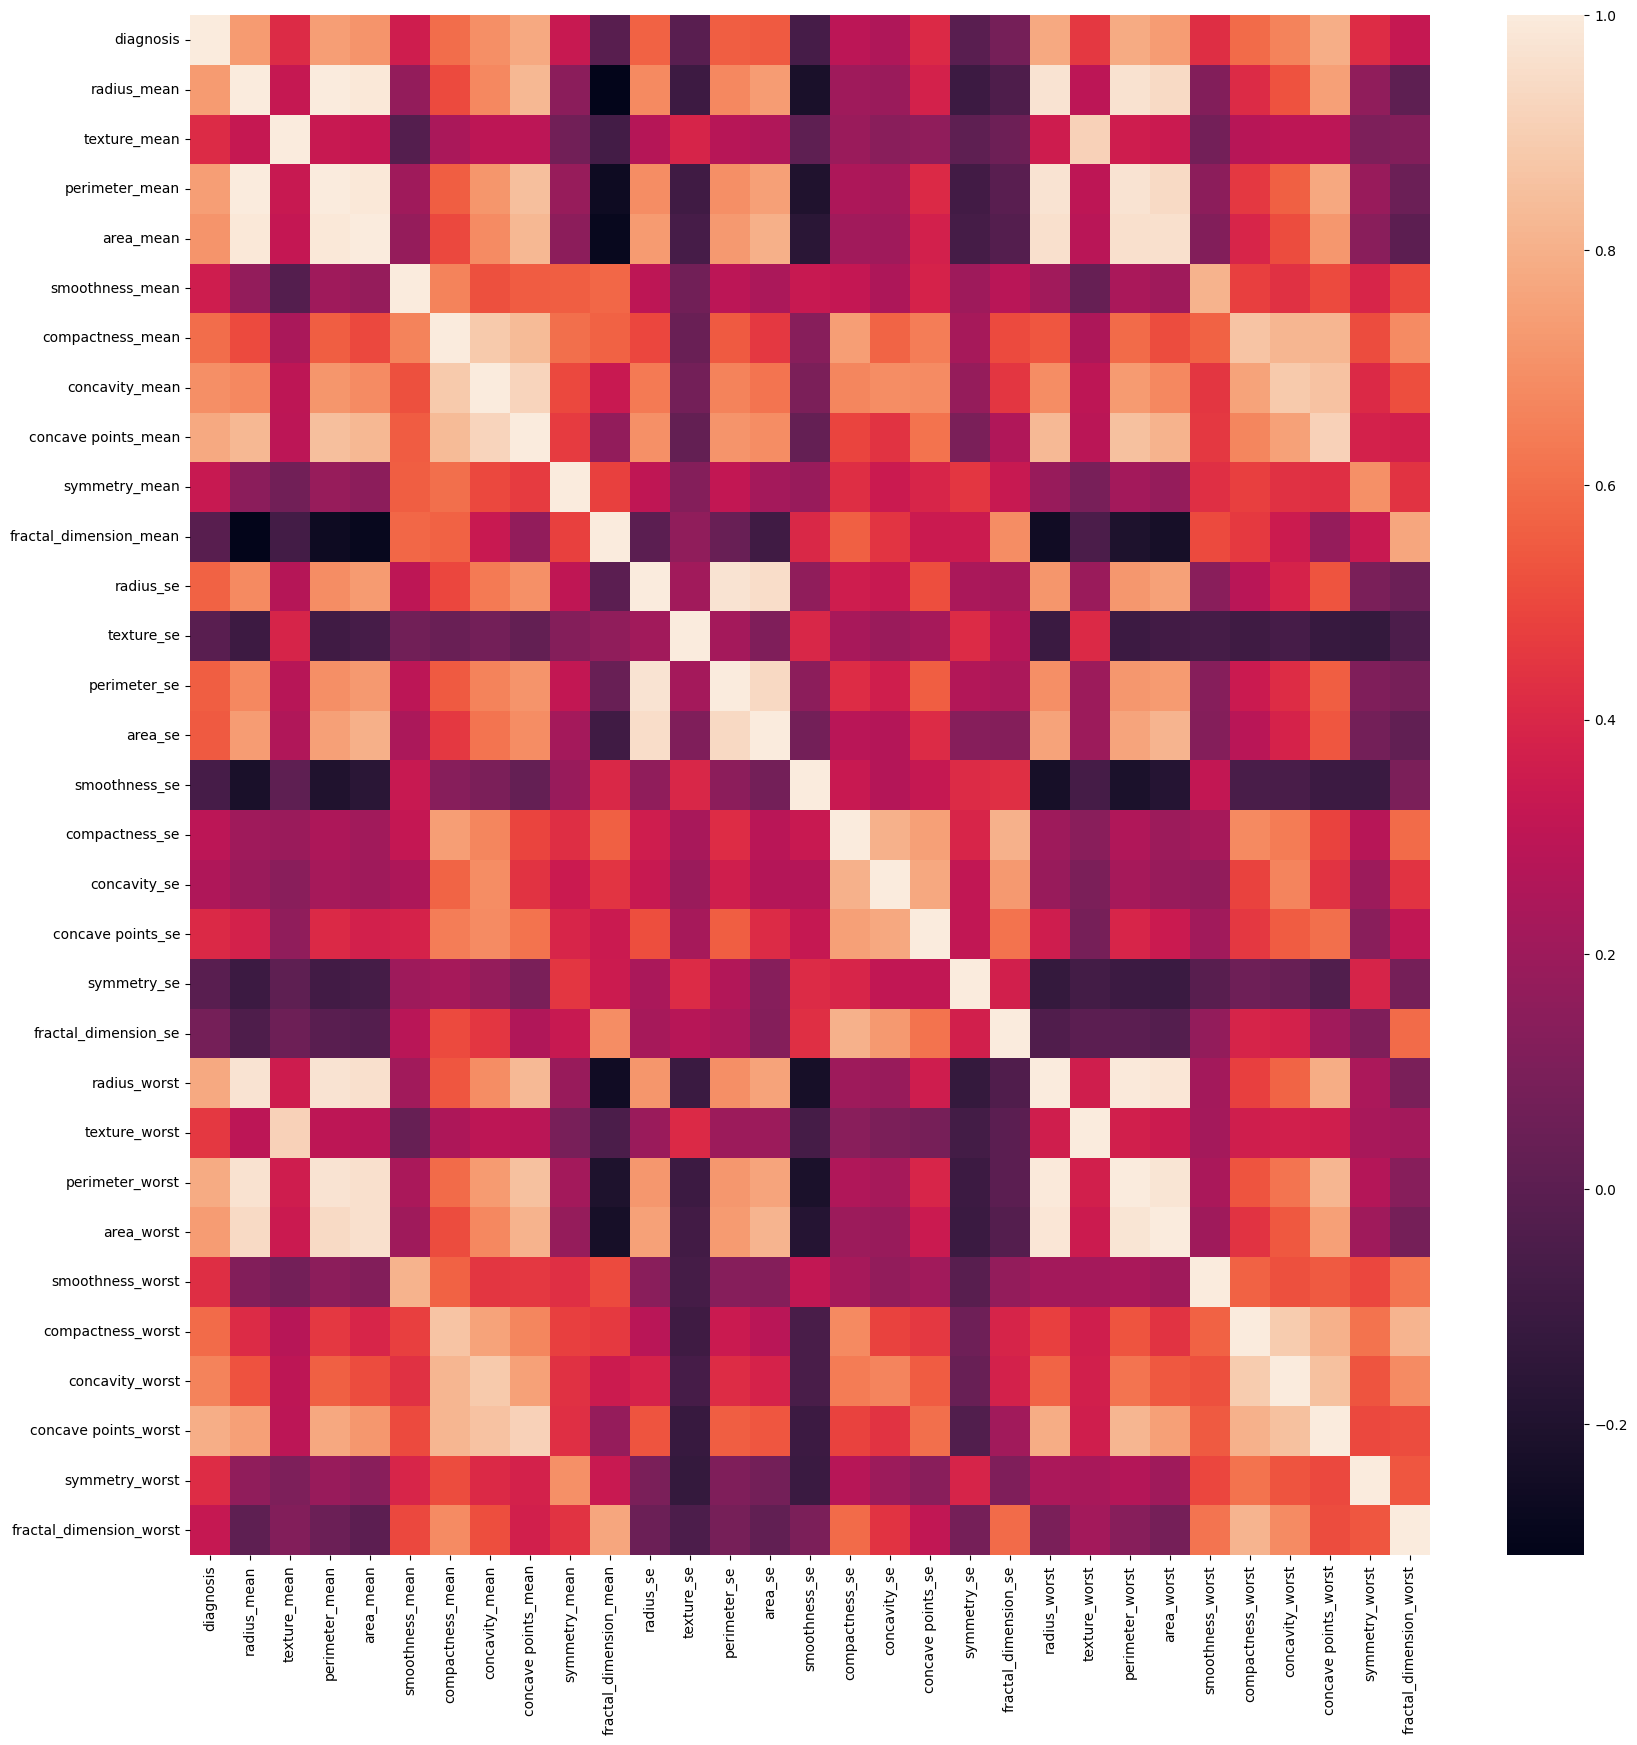

In [23]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(numeric_only = True))

In [24]:
df_corr = df.corr(numeric_only = True)
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

df_corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000,0.730,0.415,0.743,0.709,0.359,0.597,0.696,0.777,0.330,-0.013,0.567,-0.008,0.556,0.548,-0.067,0.293,0.254,0.408,-0.007,0.078,0.776,0.457,0.783,0.734,0.421,0.591,0.660,0.794,0.416,0.324
radius_mean,0.730,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,0.679,-0.097,0.674,0.736,-0.223,0.206,0.194,0.376,-0.104,-0.043,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
texture_mean,0.415,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,0.276,0.386,0.282,0.260,0.007,0.192,0.143,0.164,0.009,0.054,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
perimeter_mean,0.743,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,0.692,-0.087,0.693,0.745,-0.203,0.251,0.228,0.407,-0.082,-0.006,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
area_mean,0.709,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,0.733,-0.066,0.727,0.800,-0.167,0.213,0.208,0.372,-0.072,-0.020,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
smoothness_mean,0.359,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,0.301,0.068,0.296,0.247,0.332,0.319,0.248,0.381,0.201,0.284,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
compactness_mean,0.597,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,0.497,0.046,0.549,0.456,0.135,0.739,0.571,0.642,0.230,0.507,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
concavity_mean,0.696,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,0.632,0.076,0.660,0.617,0.099,0.670,0.691,0.683,0.178,0.449,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
concave points_mean,0.777,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,0.698,0.021,0.711,0.690,0.028,0.490,0.439,0.616,0.095,0.258,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
symmetry_mean,0.330,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,0.303,0.128,0.314,0.224,0.187,0.422,0.343,0.393,0.449,0.332,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438


<Axes: >

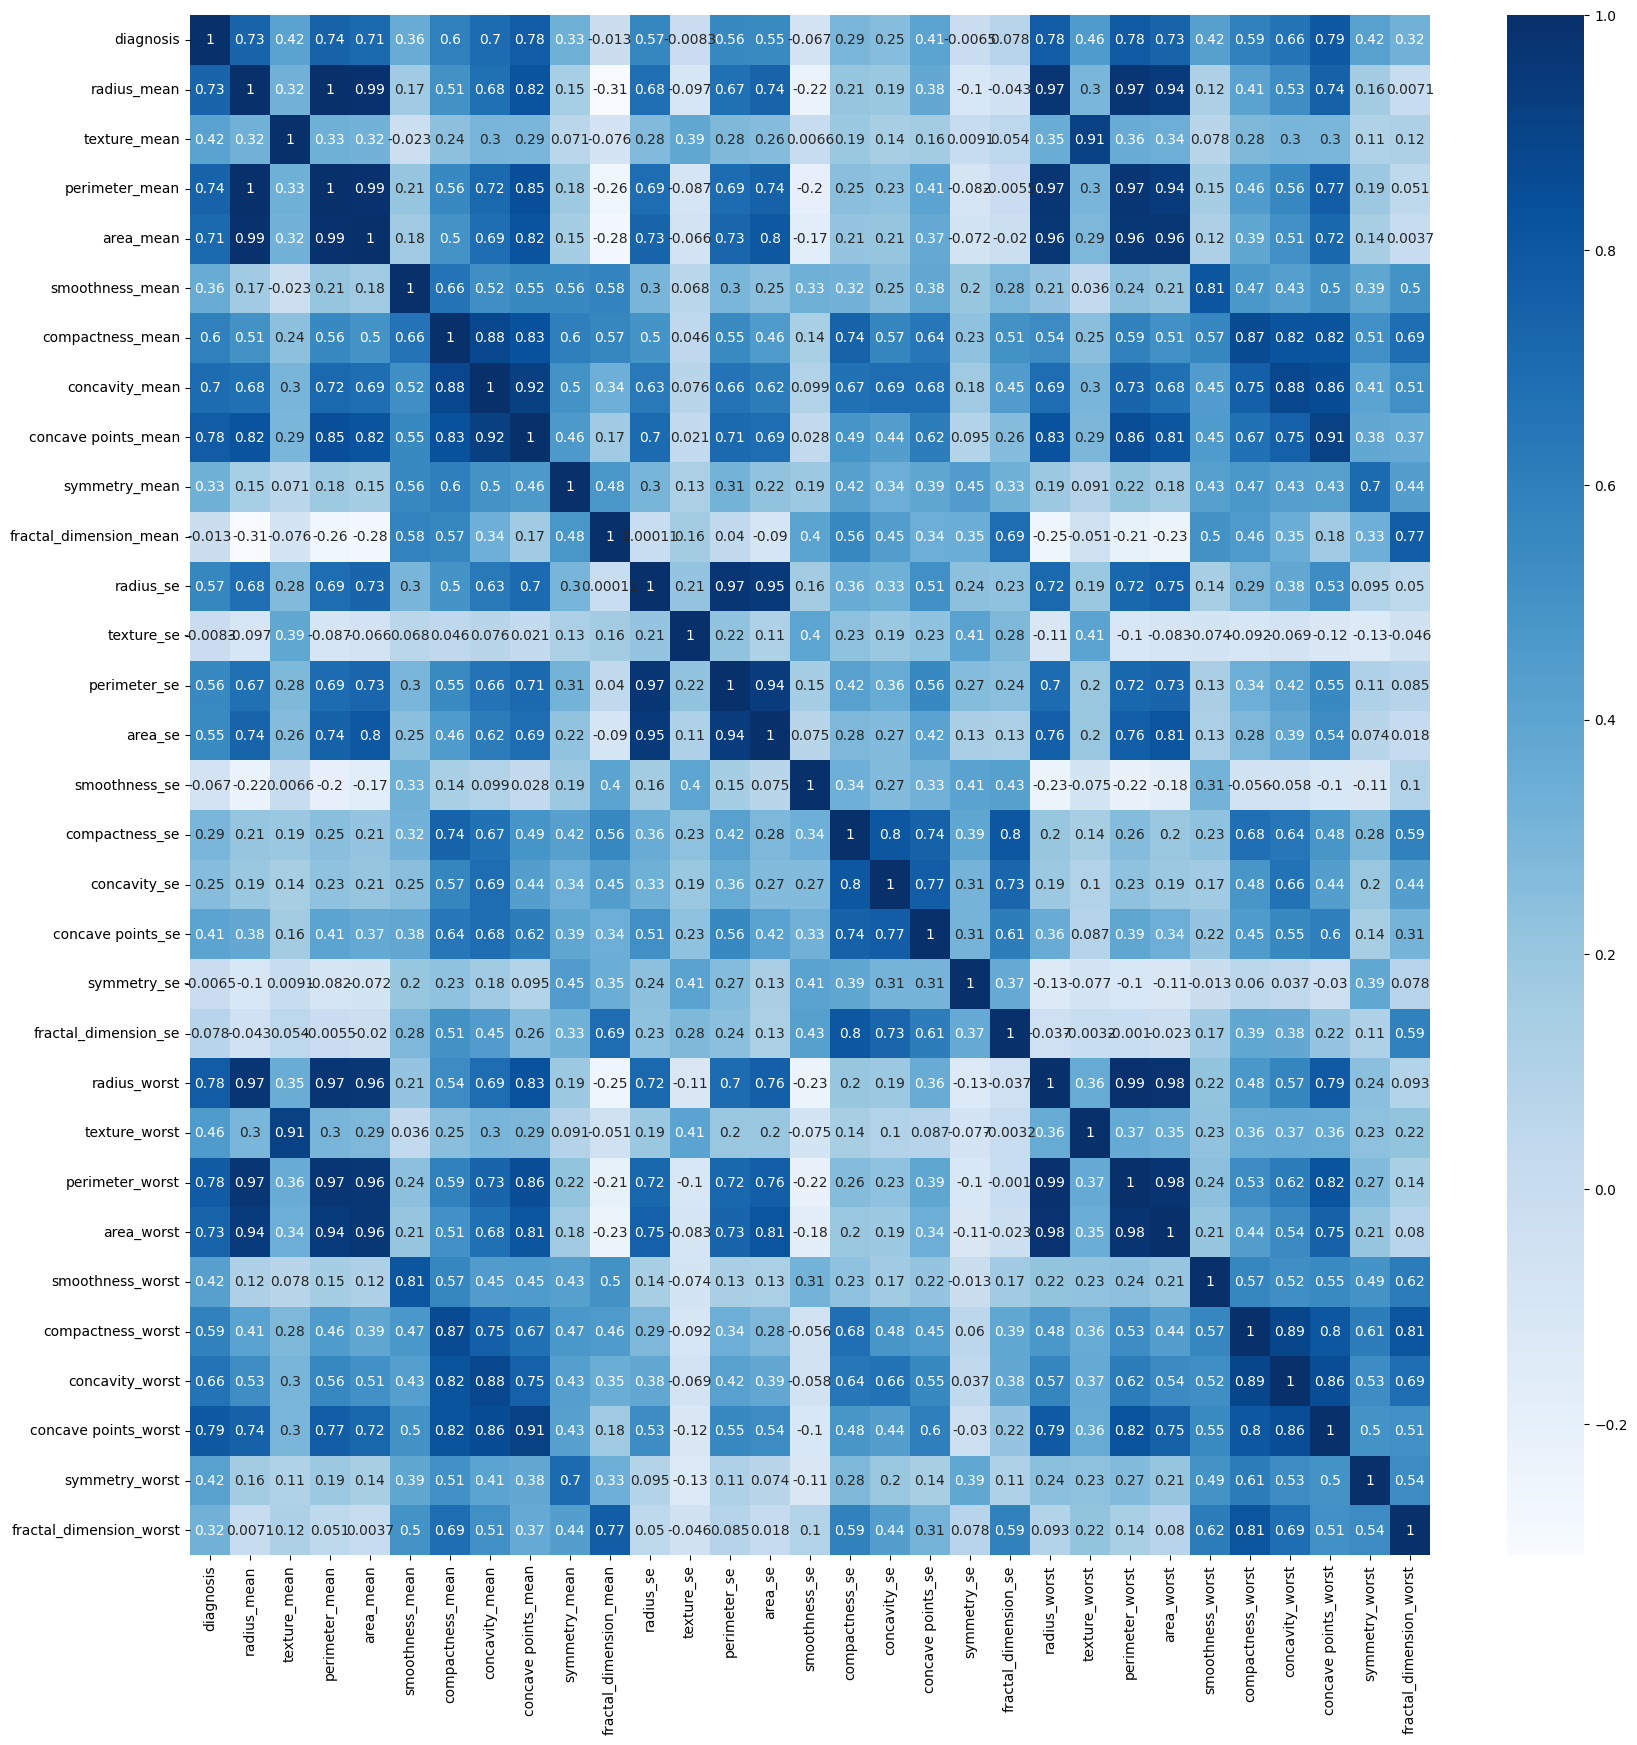

In [25]:
plt.figure(figsize = (20,20))
sns.heatmap(df_corr, cmap="Blues", annot=True)

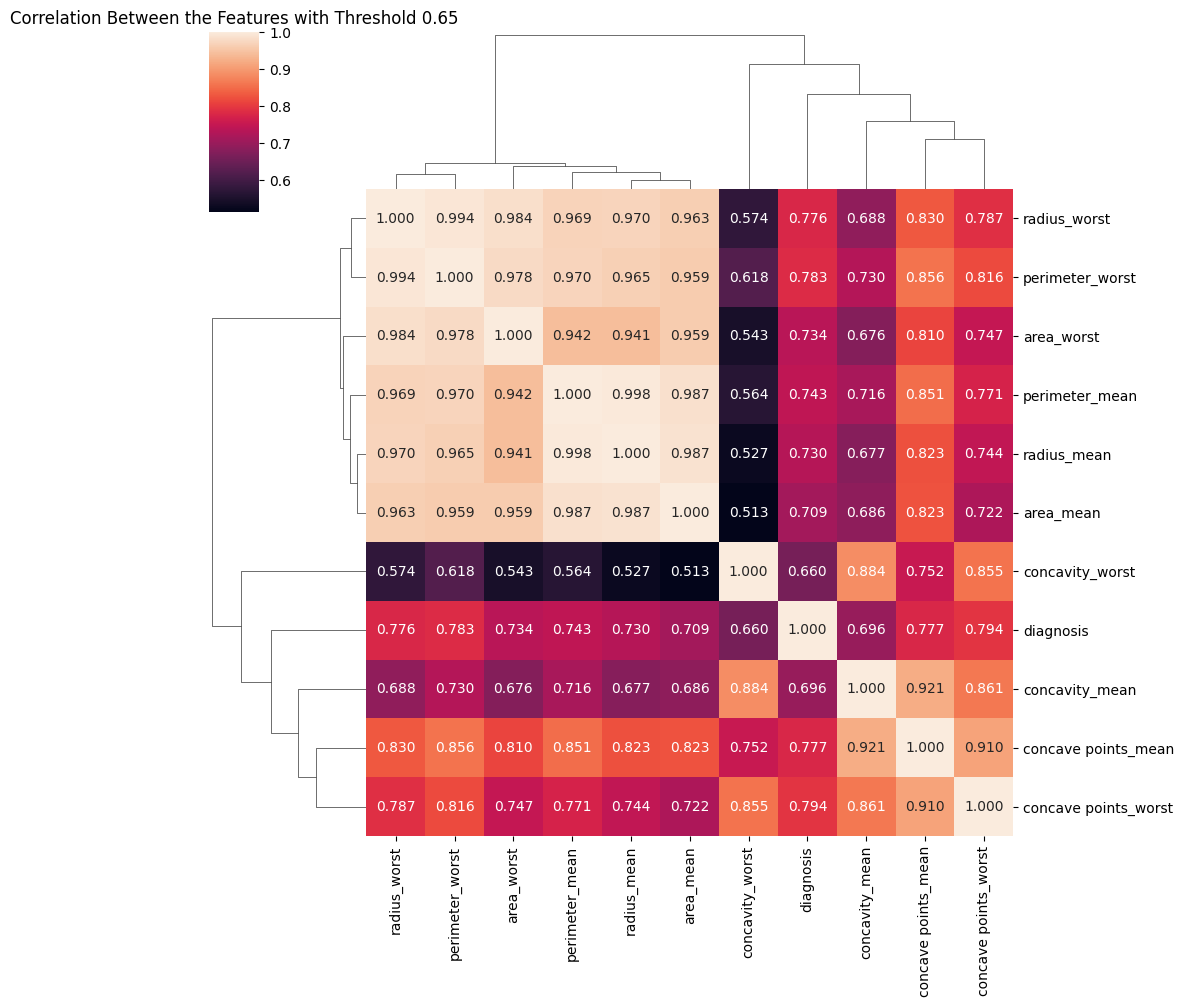

<Figure size 1000x1000 with 0 Axes>

In [26]:
# simplified correlation matrix

threshold = 0.65

filt = np.abs(df_corr["diagnosis"]) > threshold
corrFeatures = df_corr.columns[filt].tolist()

sns.clustermap(df[corrFeatures].corr(), annot = True, fmt = ".3f")
plt.title("Correlation Between the Features with Threshold 0.65")
plt.figure(figsize = (10,10))
plt.show()

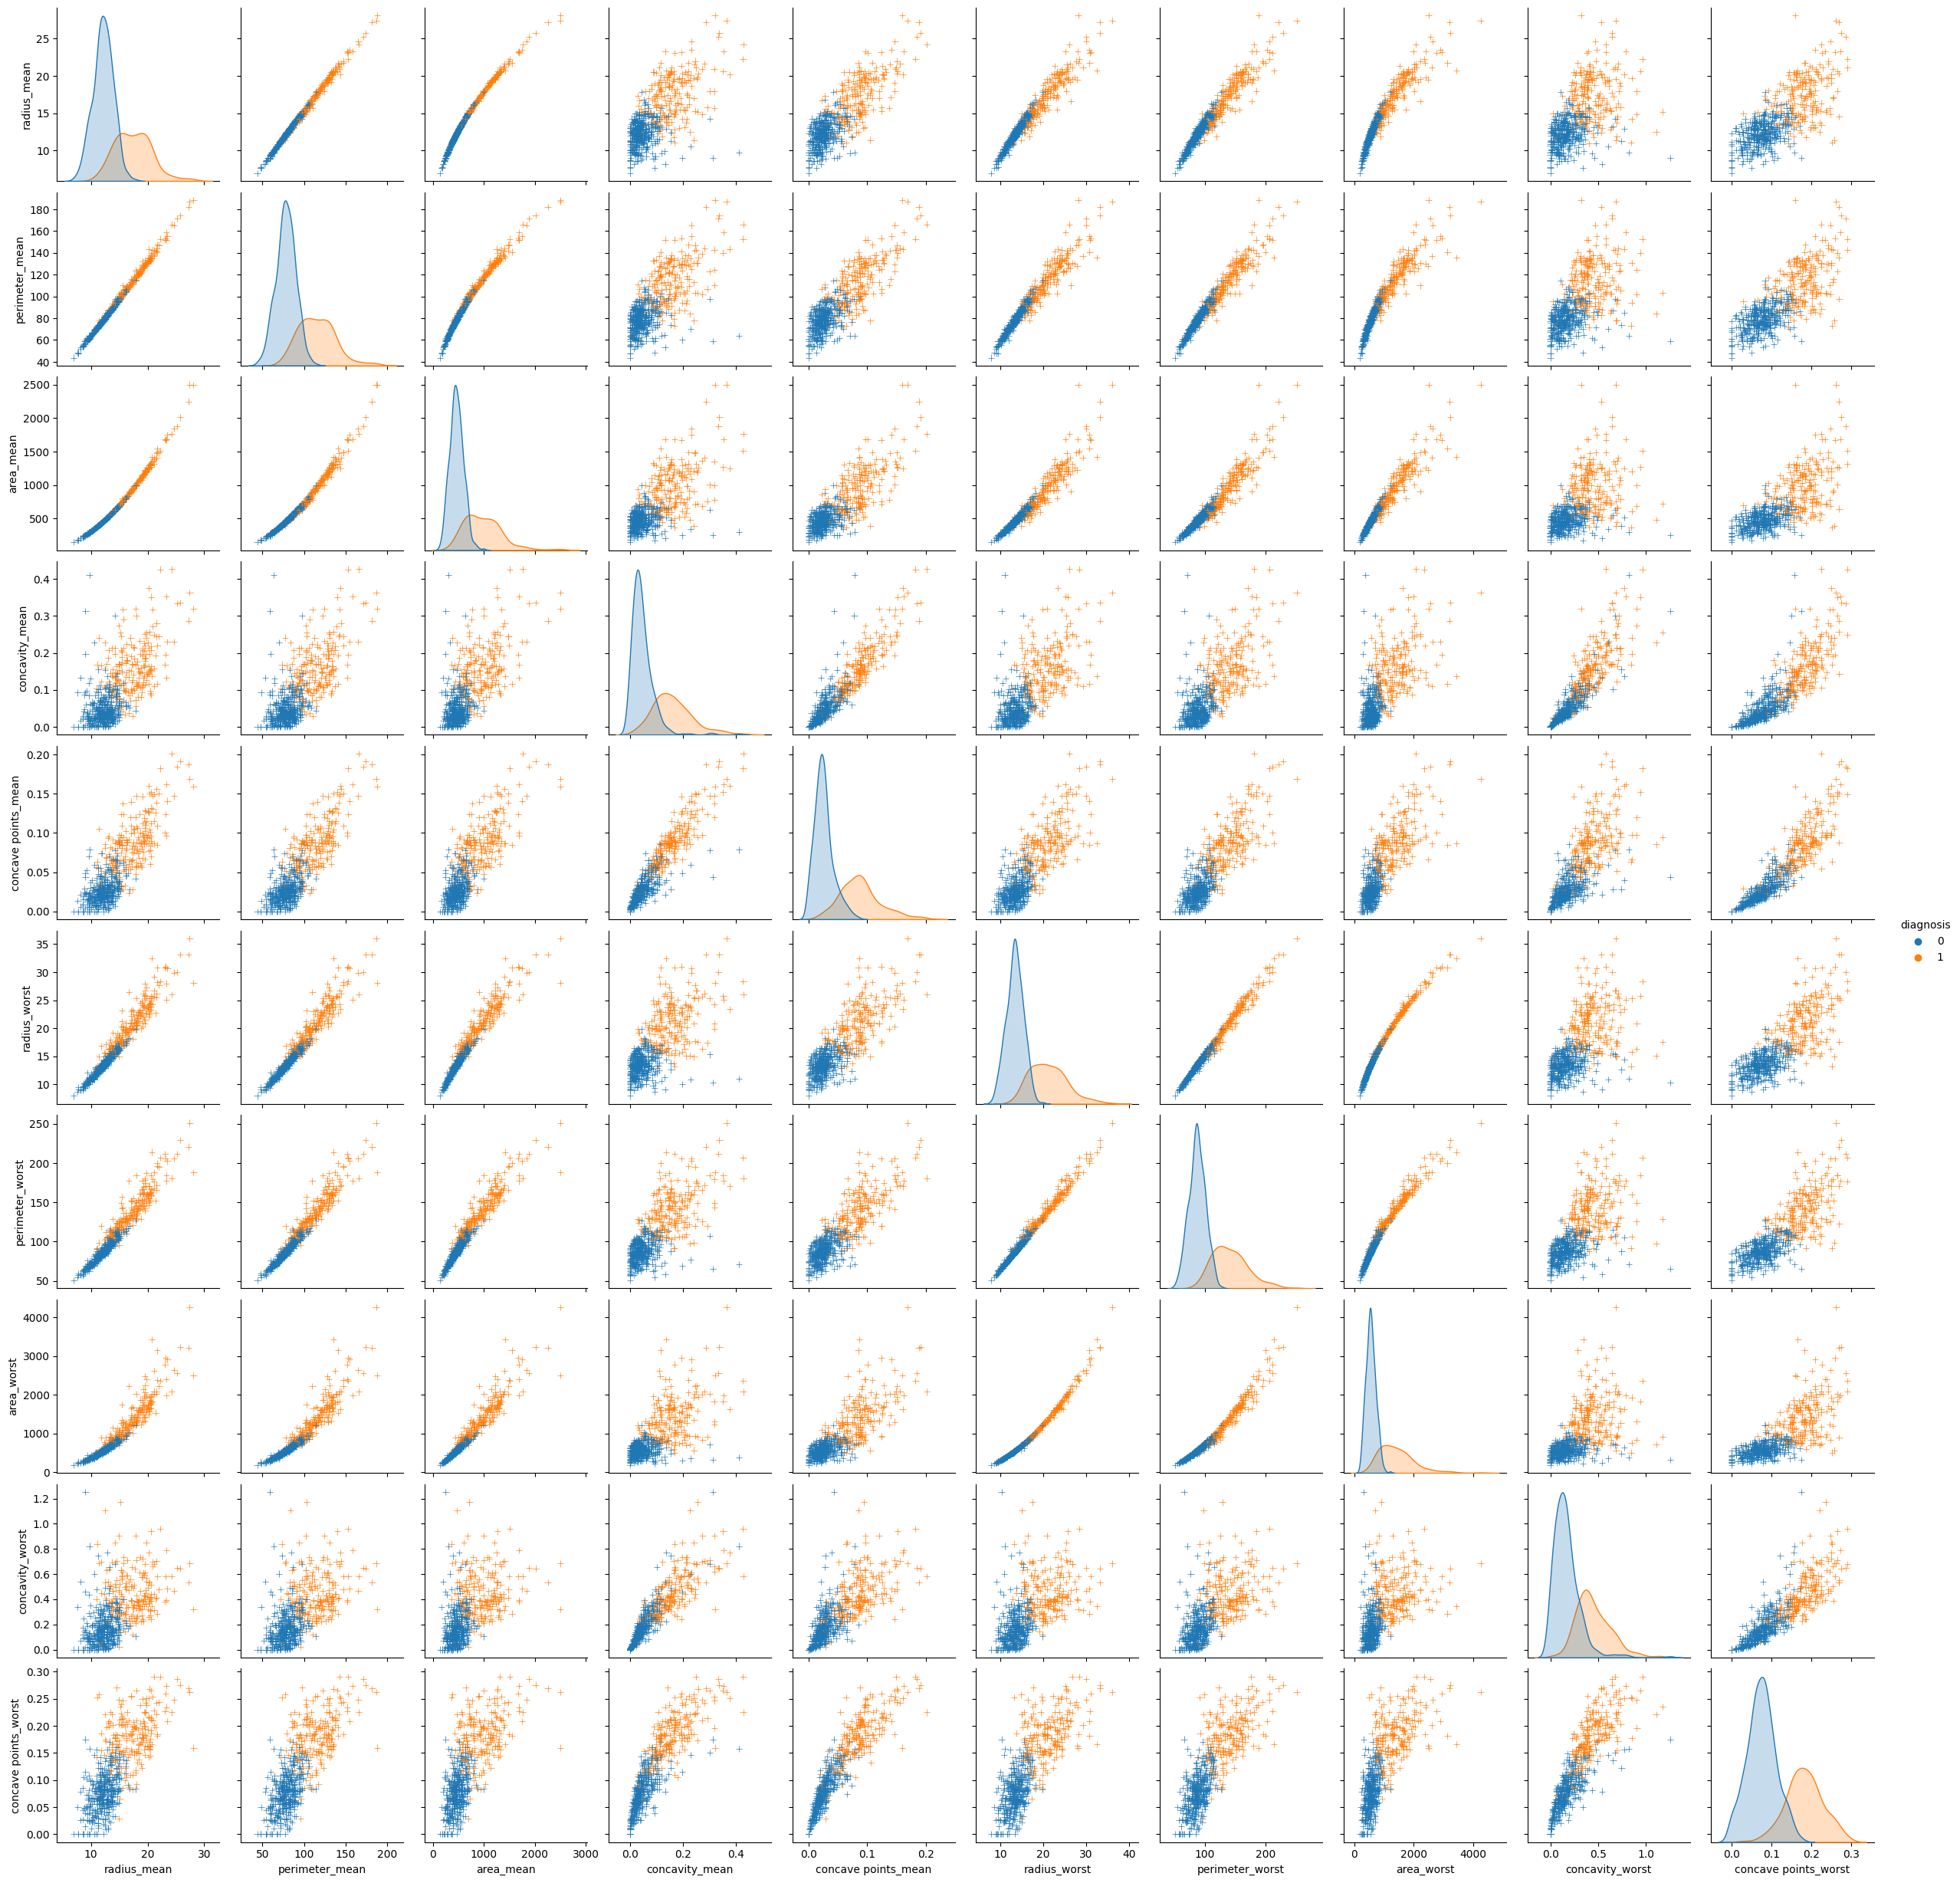

<Figure size 1000x1000 with 0 Axes>

In [27]:
sns.pairplot(df[corrFeatures], diag_kind = "kde", markers = '+', hue = "diagnosis")
plt.figure(figsize = (10,10))
plt.show()

In [28]:
y = df.loc[:,'diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [29]:
x = df.loc[:,['radius_mean', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'radius_se', 'compactness_worst', 'compactness_se']]
x

,radius_mean,texture_mean,smoothness_mean,symmetry_mean,radius_se,compactness_worst,compactness_se
0,17.99,10.38,0.11840,0.2419,1.0950,0.66560,0.04904
1,20.57,17.77,0.08474,0.1812,0.5435,0.18660,0.01308
2,19.69,21.25,0.10960,0.2069,0.7456,0.42450,0.04006
3,11.42,20.38,0.14250,0.2597,0.4956,0.86630,0.07458
4,20.29,14.34,0.10030,0.1809,0.7572,0.20500,0.02461
...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.1726,1.1760,0.21130,0.02891
565,20.13,28.25,0.09780,0.1752,0.7655,0.19220,0.02423
566,16.60,28.08,0.08455,0.1590,0.4564,0.30940,0.03731
567,20.60,29.33,0.11780,0.2397,0.7260,0.86810,0.06158


In [30]:
x['radius_mean'] = np.log(x['radius_mean'])
x['texture_mean'] = np.log(x['texture_mean'])
x['smoothness_mean'] = np.log(x['smoothness_mean'])
x['symmetry_mean'] = np.log(x['symmetry_mean'])
x['radius_se'] = np.log(x['radius_se'])
x['compactness_worst'] = np.log(x['compactness_worst'])
x['compactness_se'] = np.log(x['compactness_se'])

In [31]:
x.skew(axis=0)

radius_mean          0.305969
texture_mean        -0.013875
smoothness_mean     -0.067816
symmetry_mean        0.165701
radius_se            0.572974
compactness_worst   -0.221844
compactness_se      -0.004041
dtype: float64

In [32]:
type(x)

pandas.core.frame.DataFrame

In [33]:
type(y)

pandas.core.series.Series

# Model Building

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [35]:
sc = StandardScaler()

# fit gets the mean and standard deviation, transform applies the standardization formula to each values
x_train = sc.fit_transform(x_train)

# we will apply this same standard scaler to the x_test and just use the transform function
x_test = sc.transform(x_test)

In [36]:
# LR : 97.4
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [37]:
# KNN : 93
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
# SVM - 94.7
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state = 0)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [39]:
# Decision Tree - 92.1
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
# RandomForest - 96.5
from sklearn.ensemble import RandomForestClassifier
rdt = RandomForestClassifier(n_estimators = 100, random_state = 0)
rdt.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [41]:
# XGboost - 95.6
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Hyper-Parameter Tuning

The best training score is 0.947 with the parameters {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}.
Test Score: 0.965, Train Score: 0.958
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



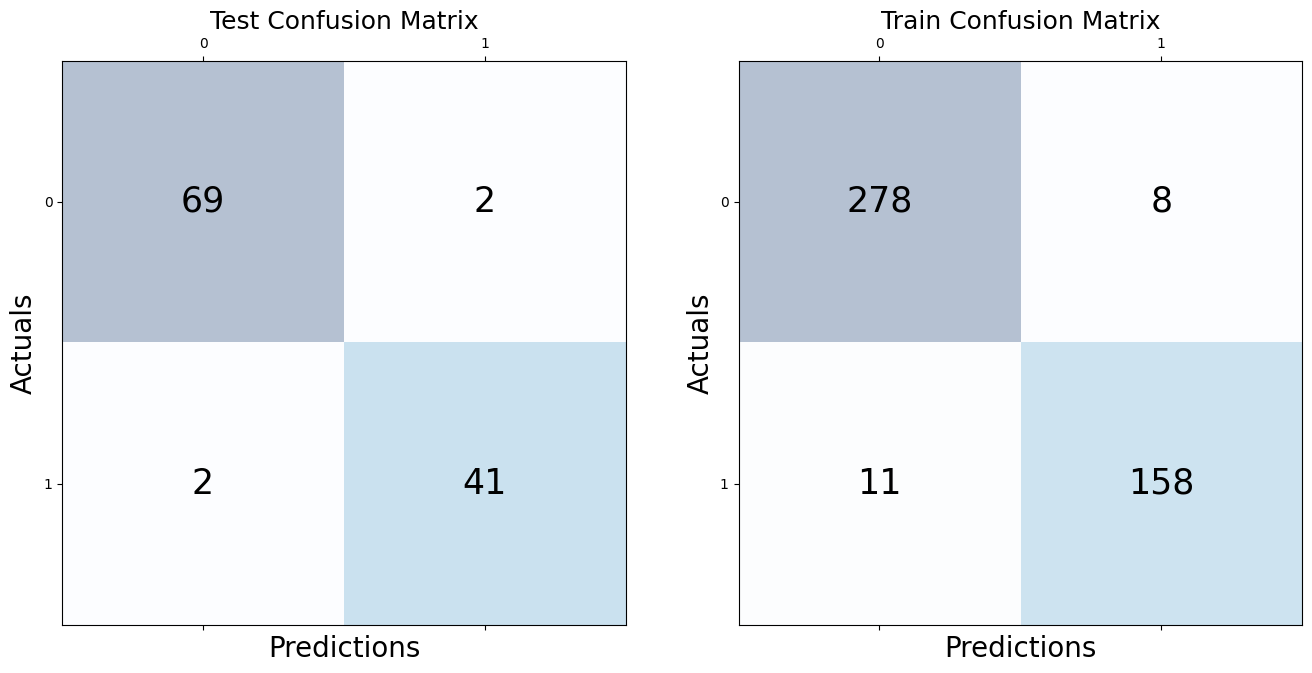

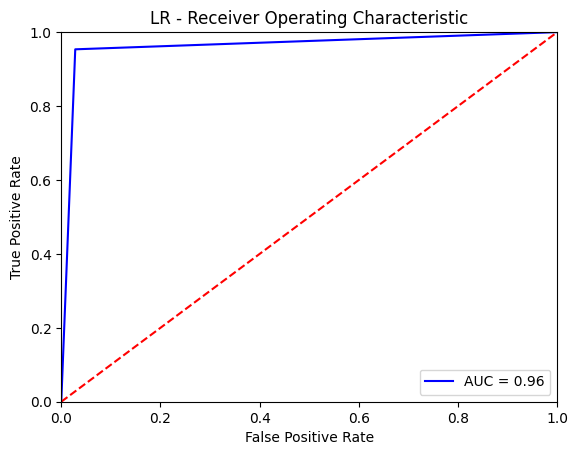


AUC:  0.9626596790042581


In [42]:
# LR - fine-tune the model - The best training score is 0.977 with the parameters {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}.
# Test Score: 0.984, Train Score: 0.989

from sklearn.model_selection import RepeatedStratifiedKFold
def lr_best_params(x_train, x_test, y_train, y_test):
    # create the params that we will change

    # define models and parameters
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    
    paramGrid = dict(solver=solvers,
                     penalty=penalty,
                     C=c_values)
    
    # create a new LR model
    lr = LogisticRegression()
    
    # thanks to Grid Search, we can try our params.
    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid = GridSearchCV(estimator=lr, param_grid=paramGrid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    grid.fit(x_train, y_train)
    
    print("The best training score is {:.3f} with the parameters {}.".format(grid.best_score_, 
                                                                          grid.best_params_))
    
    # create another KNN model, and fit the model with 
    # the params that we found above.
    lr = LogisticRegression(**grid.best_params_)
    lr.fit(x_train, y_train)
    
    yPredTest = lr.predict(x_test)
    yPredTrain = lr.predict(x_train)
    
    # create confusion matrices
    cmTest = confusion_matrix(y_test, yPredTest)
    cmTrain = confusion_matrix(y_train, yPredTrain)
    
    # calculate the accuricies
    accTest = accuracy_score(y_test, yPredTest)
    accTrain = accuracy_score(y_train, yPredTrain)
    print("Test Score: {:.3f}, Train Score: {:.3f}".format(accTest, accTrain))
    print(classification_report(y_test, yPredTest))
    #print(f1_score(y_test, yPredTest, average="macro"))
    #print(precision_score(y_test, yPredTest, average="macro"))
    #print(recall_score(y_test, yPredTest, average="macro"))
    
    # visualize confusion matrices 
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    ax[0].matshow(cmTest, cmap = plt.cm.Blues, alpha = 0.3)
    for i in range(cmTest.shape[0]):
        for j in range(cmTest.shape[1]):
            ax[0].text(x = j, y = i, s = cmTest[i, j], va = 'center', ha = 'center', fontsize = 25)
 
    ax[0].set_title('Test Confusion Matrix', fontsize = 18)
    ax[0].set_xlabel('Predictions', fontsize = 20)
    ax[0].set_ylabel('Actuals', fontsize = 20)
    
    ax[1].matshow(cmTrain, cmap = plt.cm.Blues, alpha = 0.3)
    for i in range(cmTrain.shape[0]):
        for j in range(cmTrain.shape[1]):
            ax[1].text(x = j, y = i, s = cmTrain[i, j], va = 'center', ha = 'center', fontsize = 25)
 
    ax[1].set_title('Train Confusion Matrix', fontsize = 18)
    ax[1].set_xlabel('Predictions', fontsize = 20)
    ax[1].set_ylabel('Actuals', fontsize = 20)

    plt.show()

    # calculate the fpr and tpr for all thresholds of the classification

    fpr, tpr, threshold = roc_curve(y_test, yPredTest)
    roc_auc = auc(fpr, tpr)

    # method I: plt 
    plt.title('LR - Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    #plt.tight_layout()
    plt.show()
    print("\nAUC: ", roc_auc)
    
    return grid

grid = lr_best_params(x_train, x_test, y_train, y_test)

The best training score is 0.958 with the parameters {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}.
Test Score: 0.965, Train Score: 0.965
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



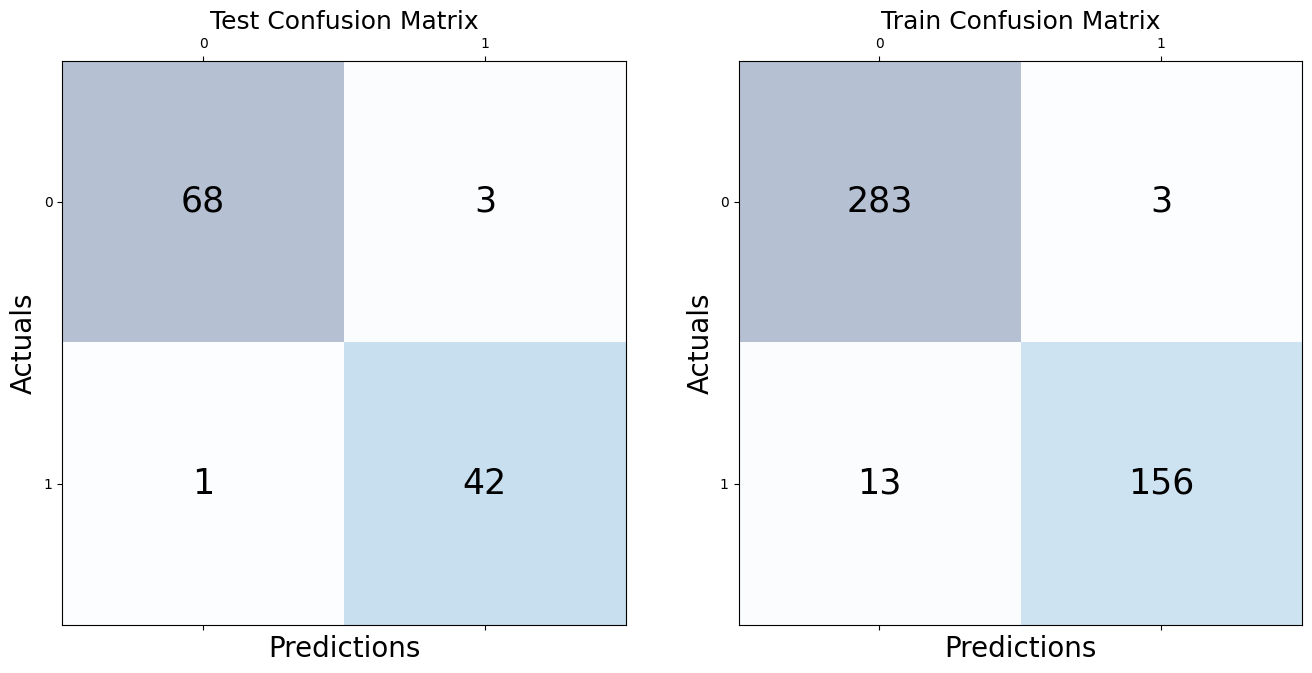

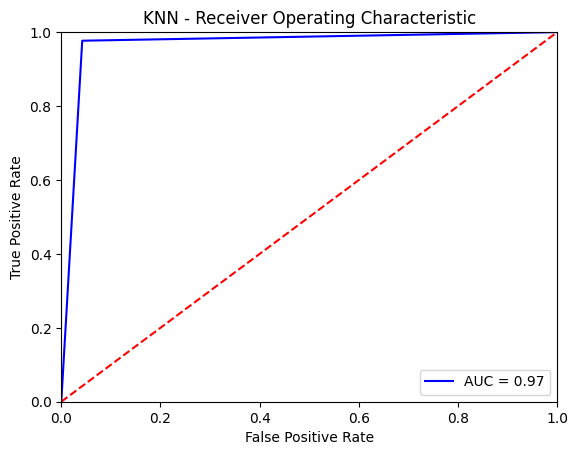


AUC:  0.9672453324598755


In [43]:
# KNN - fine-tune the model - 99.4

def knn_best_params(x_train, x_test, y_train, y_test):
    # create the params that we will change
    kRange = list(range(1, 31))
    weightOptions = ["uniform", "distance"]
    algorithmOptions = ["auto", "ball_tree", "kd_tree", "brute"]
    pOptions = [1, 2]
    
    paramGrid = dict(n_neighbors = kRange, 
                     weights = weightOptions,
                     algorithm = algorithmOptions,
                     p = pOptions)
    
    # create a new KNNN model
    knn = KNeighborsClassifier()
    
    # thanks to Grid Search, we can try our params.
    grid = GridSearchCV(knn, paramGrid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("The best training score is {:.3f} with the parameters {}.".format(grid.best_score_, 
                                                                          grid.best_params_))
    
    # create another KNN model, and fit the model with 
    # the params that we found above.
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    yPredTest = knn.predict(x_test)
    yPredTrain = knn.predict(x_train)
    
    # create confusion matrices
    cmTest = confusion_matrix(y_test, yPredTest)
    cmTrain = confusion_matrix(y_train, yPredTrain)
    
    # calculate the accuricies
    accTest = accuracy_score(y_test, yPredTest)
    accTrain = accuracy_score(y_train, yPredTrain)
    print("Test Score: {:.3f}, Train Score: {:.3f}".format(accTest, accTrain))
    print(classification_report(y_test, yPredTest))
    
    # visualize confusion matrices 
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    ax[0].matshow(cmTest, cmap = plt.cm.Blues, alpha = 0.3)
    for i in range(cmTest.shape[0]):
        for j in range(cmTest.shape[1]):
            ax[0].text(x = j, y = i, s = cmTest[i, j], va = 'center', ha = 'center', fontsize = 25)
 
    ax[0].set_title('Test Confusion Matrix', fontsize = 18)
    ax[0].set_xlabel('Predictions', fontsize = 20)
    ax[0].set_ylabel('Actuals', fontsize = 20)
    
    ax[1].matshow(cmTrain, cmap = plt.cm.Blues, alpha = 0.3)
    for i in range(cmTrain.shape[0]):
        for j in range(cmTrain.shape[1]):
            ax[1].text(x = j, y = i, s = cmTrain[i, j], va = 'center', ha = 'center', fontsize = 25)
 
    ax[1].set_title('Train Confusion Matrix', fontsize = 18)
    ax[1].set_xlabel('Predictions', fontsize = 20)
    ax[1].set_ylabel('Actuals', fontsize = 20)

    plt.show()

    # calculate the fpr and tpr for all thresholds of the classification

    fpr, tpr, threshold = roc_curve(y_test, yPredTest)
    roc_auc = auc(fpr, tpr)

    # method I: plt 
    plt.title('KNN - Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    
    #plt.tight_layout()
    plt.show()
    print("\nAUC: ", roc_auc)
    
    return grid

grid = knn_best_params(x_train, x_test, y_train, y_test)

The best training score is 0.956 with the parameters {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 650}.
Test Score: 0.956, Train Score: 1.000
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



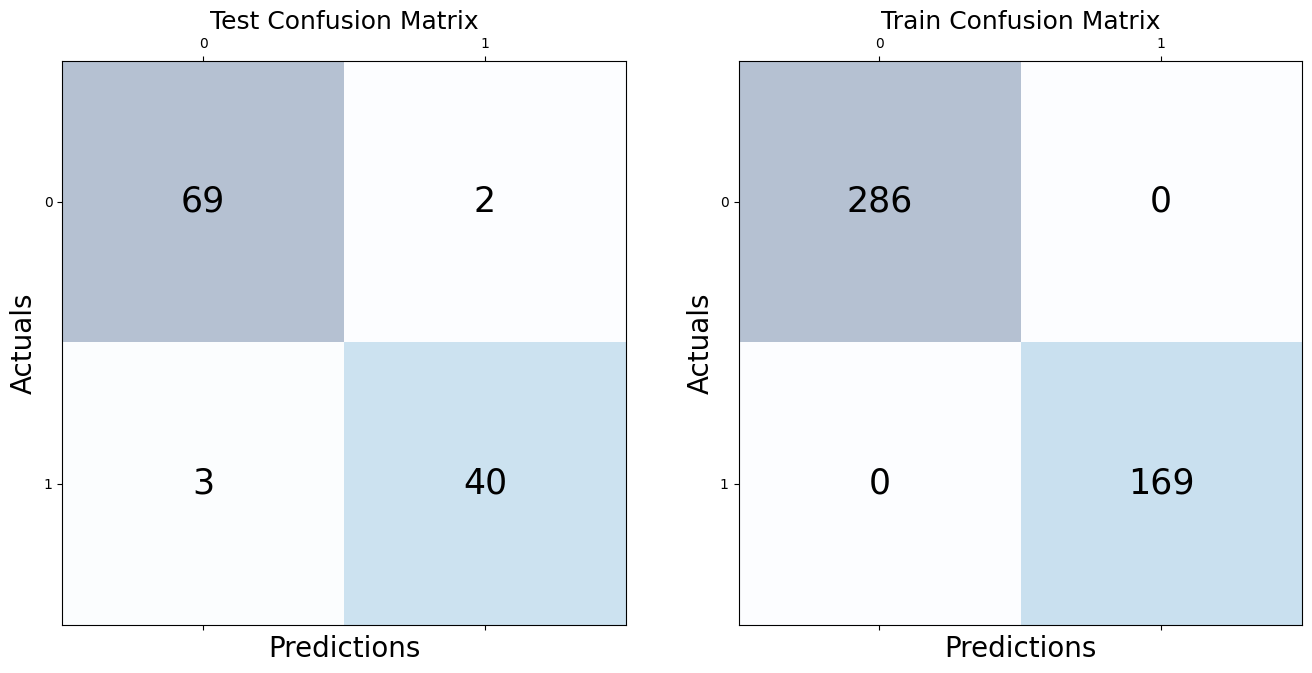

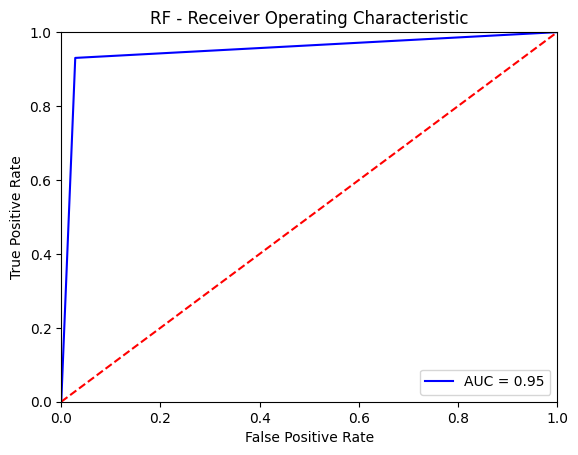


AUC:  0.9510317720275139


In [44]:
# RandomForest - fine-tune the model - 98.8

def rf_best_params(x_train, x_test, y_train, y_test):
    # create the params that we will change
    nRange = list(range(50,1000,50))
    ct = ["gini", "entropy", "log_loss"]
    mfeatures = ["sqrt", "log2"]
    
    paramGrid = dict(n_estimators = [100,500,650,1000], 
                     criterion = ct,
                     max_features = mfeatures)
    
    # create a new KNNN model
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state = 42)
    
    # thanks to Grid Search, we can try our params.
    grid = GridSearchCV(rf, paramGrid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("The best training score is {:.3f} with the parameters {}.".format(grid.best_score_, 
                                                                          grid.best_params_))
    
    # create another KNN model, and fit the model with 
    # the params that we found above.
    rf = RandomForestClassifier(**grid.best_params_)
    rf.fit(x_train, y_train)
    
    yPredTest = rf.predict(x_test)
    yPredTrain = rf.predict(x_train)
    
    # create confusion matrices
    cmTest = confusion_matrix(y_test, yPredTest)
    cmTrain = confusion_matrix(y_train, yPredTrain)
    
    # calculate the accuricies
    accTest = accuracy_score(y_test, yPredTest)
    accTrain = accuracy_score(y_train, yPredTrain)
    print("Test Score: {:.3f}, Train Score: {:.3f}".format(accTest, accTrain))
    print(classification_report(y_test, yPredTest))
    
    # visualize confusion matrices 
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    ax[0].matshow(cmTest, cmap = plt.cm.Blues, alpha = 0.3)
    for i in range(cmTest.shape[0]):
        for j in range(cmTest.shape[1]):
            ax[0].text(x = j, y = i, s = cmTest[i, j], va = 'center', ha = 'center', fontsize = 25)
 
    ax[0].set_title('Test Confusion Matrix', fontsize = 18)
    ax[0].set_xlabel('Predictions', fontsize = 20)
    ax[0].set_ylabel('Actuals', fontsize = 20)
    
    ax[1].matshow(cmTrain, cmap = plt.cm.Blues, alpha = 0.3)
    for i in range(cmTrain.shape[0]):
        for j in range(cmTrain.shape[1]):
            ax[1].text(x = j, y = i, s = cmTrain[i, j], va = 'center', ha = 'center', fontsize = 25)
 
    ax[1].set_title('Train Confusion Matrix', fontsize = 18)
    ax[1].set_xlabel('Predictions', fontsize = 20)
    ax[1].set_ylabel('Actuals', fontsize = 20)

    plt.show()

    # calculate the fpr and tpr for all thresholds of the classification

    fpr, tpr, threshold = roc_curve(y_test, yPredTest)
    roc_auc = auc(fpr, tpr)

    # method I: plt 
    plt.title('RF - Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    #plt.tight_layout()
    plt.show()
    print("\nAUC: ", roc_auc)
    
    return grid

grid = rf_best_params(x_train, x_test, y_train, y_test)

# Evaluation

In [45]:
yPredTest = xg.predict(x_test)
yPredTrain = xg.predict(x_train)
    
# create confusion matrices
cmTest = confusion_matrix(y_test, yPredTest)
cmTrain = confusion_matrix(y_train, yPredTrain)
    
# calculate the accuricies
accTest = accuracy_score(y_test, yPredTest)
accTrain = accuracy_score(y_train, yPredTrain)
print("Test Score: {:.3f}, Train Score: {:.3f}".format(accTest, accTrain))
print(classification_report(y_test, yPredTest))

Test Score: 0.956, Train Score: 1.000
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

